# Lecture 04 Solution

## Multivariate Gaussian Classifier

### task1a: load dataset

In [1]:
import numpy as np
trainA = np.loadtxt( 'dataLec04/trainA.dat' )
trainB = np.loadtxt( 'dataLec04/trainB.dat' )
trainC = np.loadtxt( 'dataLec04/trainC.dat' )
testA = np.loadtxt( 'dataLec04/testA.dat' )
testB = np.loadtxt( 'dataLec04/testB.dat' )
testC = np.loadtxt( 'dataLec04/testC.dat' )

#### Q: How many points from each class for training and how many for testing? How many features?

In [2]:
print('train A:', trainA.shape)
print('train B:', trainB.shape)
print('train C:', trainC.shape)
print('test A:', testA.shape)
print('test B:', testB.shape)
print('test C:', testC.shape)

train A: (200, 2)
train B: (200, 2)
train C: (200, 2)
test A: (100, 2)
test B: (100, 2)
test C: (100, 2)


### task1b: plot scatters

In [3]:
import matplotlib.pyplot as plt
import numpy as np

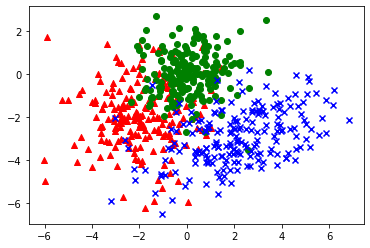

In [4]:
plt.scatter(trainA[:,0],trainA[:,1],marker='^',c='r') 
plt.scatter(trainB[:,0],trainB[:,1],marker='o',c='g')
plt.scatter(trainC[:,0],trainC[:,1],marker='x',c='b')
# you can change the color if you dislike them

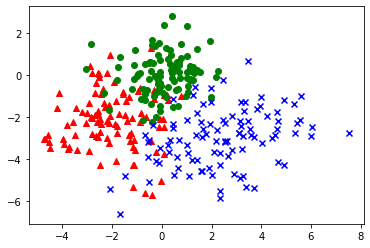

In [5]:
plt.scatter(testA[:,0],testA[:,1],marker='^',c='r') 
plt.scatter(testB[:,0],testB[:,1],marker='o',c='g')
plt.scatter(testC[:,0],testC[:,1],marker='x',c='b')

### task 2: compute the mean and variance of train data in each class

#### $\mu$ of trainA

In [6]:
muA = np.mean(trainA,0)
print(muA.shape)

(2,)


In [7]:
muA

array([-1.97111526, -1.90272101])

Question: why is it not **np.mean(trainA,1)**

In [8]:
covA = np.cov(trainA, rowvar= False) # Question: what if rowvar = True
print(covA.shape)

(2, 2)


In [9]:
muB = np.mean(trainB,0)
muC = np.mean(trainC,0)
covB = np.cov(trainB, rowvar= False)
covC = np.cov(trainC, rowvar= False)

#### task3: compute the posterior probabilities

you can use : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal

In [ ]:
from scipy.stats import multivariate_normal

In [11]:
def cal_multi_normals(x,muA, muB, muC, covA, covB, covC):
    ya = multivariate_normal.pdf(x, muA, covA); 
    yb = multivariate_normal.pdf(x, muB, covB); 
    yc = multivariate_normal.pdf(x, muC, covC); 
    y = np.stack((ya,yb,yc),axis=1)
    return y

In [12]:
yA = cal_multi_normals(testA, muA, muB, muC, covA, covB, covC)
yB = cal_multi_normals(testB, muA, muB, muC, covA, covB, covC)
yC = cal_multi_normals(testC, muA, muB, muC, covA, covB, covC)

In [13]:
yA.shape

(100, 3)

#### task 4: assign the data to the class has the maximum posterior probabilities

hint: find the index where has the largest posteriro probabilities for each data point

In [14]:
# when we have to repeatedly use the same block code, it is more convenient to create a function
def decision_rule_maximum_pos(y, test_set):
    '''
        the function is to find the maximum posterior probability
        
    INPUT: 
                 y: three columns of probabilities computed from three Gaussian pdf
          test_set: test set 
    OUTPUT:
          result_A: the samples that are classified as A
          result_B: the samples that are classified as B
          result_C: the samples that are classified as C
    '''
    
    maximum_class = np.argmax(y, axis=1)  # the index where has the maximum value

    index_A = np.where(maximum_class==0)  # the index which was classified as A
    index_B = np.where(maximum_class==1)  # the index which was classified as B
    index_C = np.where(maximum_class==2)  # the index which was classified as C
    print(index_A)
    result_A = test_set[index_A,:].reshape((int(test_set[index_A,:].size/2),2))  # get the data that are classfied to be A
    result_B = test_set[index_B,:].reshape((int(test_set[index_B,:].size/2),2))  # get the data that are classfied to be B
    result_C = test_set[index_C,:].reshape((int(test_set[index_C,:].size/2),2))  # get the data that are classfied to be C
    plt.figure(figsize=(5,5))
    plt.scatter(result_A[:,0],result_A[:,1],marker='^',c='r')  
    plt.scatter(result_B[:,0],result_B[:,1],marker='o',c='g')  
    plt.scatter(result_C[:,0],result_C[:,1],marker='x',c='b')
    plt.xlim([-6,6])
    plt.ylim([-6,6])
    return result_A, result_B, result_C

(-6.0, 6.0)

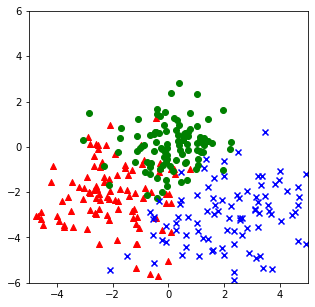

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(testA[:,0],testA[:,1],marker='^',c='r') 
plt.scatter(testB[:,0],testB[:,1],marker='o',c='g')
plt.scatter(testC[:,0],testC[:,1],marker='x',c='b')
plt.xlim([-5,5])
plt.ylim([-6,6])

### <span style="color:red"> Two ways to evaluate the classification result</span>
<span style="color:red">* 1. Plot the scatters and compare</span>

<span style="color:red">* 2. Compute the accuracy</span>



### 1. plot the scatters
For each test dataset(testA, testB, testC), you can check them separately:

(array([ 0,  1,  2,  3,  4,  5,  6,  8, 11, 12, 13, 14, 15, 16, 19, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 46, 47, 49, 51, 52, 53, 54, 56, 57, 58, 59, 60,
       61, 63, 65, 66, 67, 68, 69, 70, 72, 74, 75, 76, 78, 79, 80, 81, 82,
       83, 84, 85, 89, 90, 91, 92, 93, 94, 97, 98, 99]),)


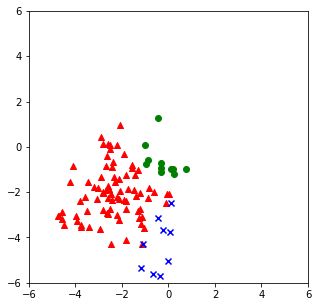

In [16]:
# check testset A
a_a, a_b, a_c = decision_rule_maximum_pos(yA,testA) # a_a means that the data that belongs to a was classified to a
                                                    # a_b means that the data that belongs to a was classified to b
                                                    # a_c means that the data that belongs to a was classified to c

(array([25, 26, 27, 28, 51, 80, 82, 94]),)


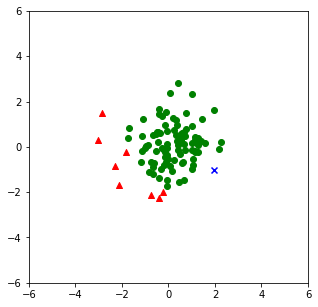

In [17]:
# check testset B
b_a, b_b, b_c = decision_rule_maximum_pos(yB,testB) # b_a means that the data that belongs to b was classified to a
                                                    # b_b means that the data that belongs to b was classified to b
                                                    # b_c means that the data that belongs to b was classified to c

(array([ 2, 62, 79, 91, 96, 98]),)


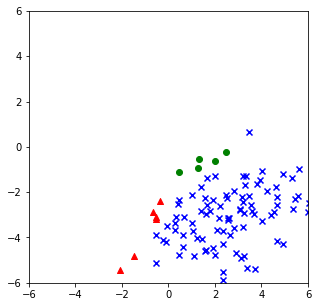

In [18]:
# check testset C
c_a, c_b, c_c = decision_rule_maximum_pos(yC,testC) # c_a means that the data that belongs to c was classified to a
                                                    # c_b means that the data that belongs to c was classified to b
                                                    # c_c means that the data that belongs to c was classified to c

### Plot results of three dataset together

(-6.0, 6.0)

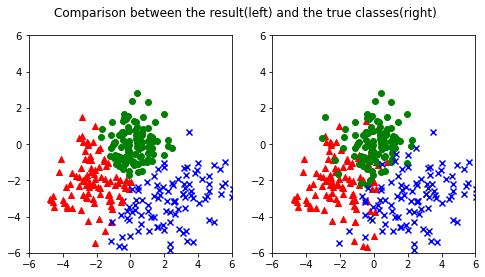

In [19]:
fig, axs = plt.subplots(1,2,figsize=(8,4))
fig.suptitle('Comparison between the result(left) and the true classes(right)')
# result of testA
axs[0].scatter(a_a[:,0],a_a[:,1],marker='^',c='r') 
axs[0].scatter(a_b[:,0],a_b[:,1],marker='o',c='g')
axs[0].scatter(a_c[:,0],a_c[:,1],marker='x',c='b')
# result of testB
axs[0].scatter(b_a[:,0],b_a[:,1],marker='^',c='r') 
axs[0].scatter(b_b[:,0],b_b[:,1],marker='o',c='g')
axs[0].scatter(b_c[:,0],b_c[:,1],marker='x',c='b')
# result of testC
axs[0].scatter(c_a[:,0],c_a[:,1],marker='^',c='r') 
axs[0].scatter(c_b[:,0],c_b[:,1],marker='o',c='g')
axs[0].scatter(c_c[:,0],c_c[:,1],marker='x',c='b')
# plot the true classes
axs[1].scatter(testA[:,0],testA[:,1],marker='^',c='r') 
axs[1].scatter(testB[:,0],testB[:,1],marker='o',c='g')
axs[1].scatter(testC[:,0],testC[:,1],marker='x',c='b')
axs[0].set_xlim([-6,6])
axs[0].set_ylim([-6,6])
axs[1].set_xlim([-6,6])
axs[1].set_ylim([-6,6])

### 2. compute the accuracy


In [20]:
totalN = testA.shape[0] + testB.shape[0] + testC.shape[0]  # the total number of the data
correctN = a_a.shape[0] + b_b.shape[0] + c_c.shape[0] 

In [21]:
acc = correctN/totalN
print(acc)

0.8666666666666667


### **play around with 3D**

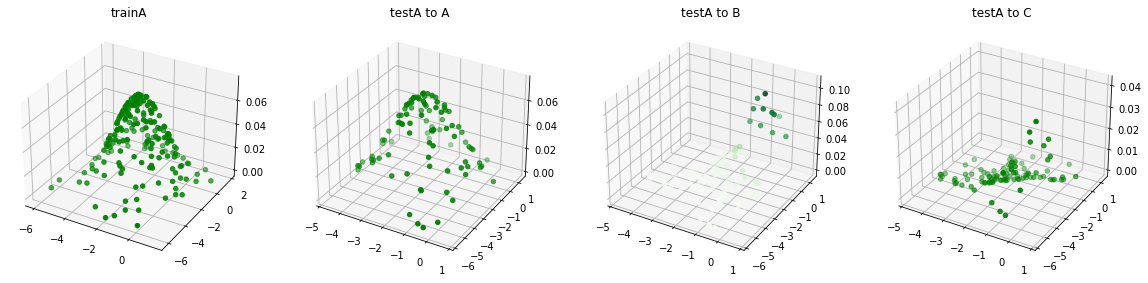

In [22]:
from matplotlib import cm

# plot the trainA in 3D 
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 4, 1, projection='3d')

x, y = trainA[:,0], trainA[:,1]
z = multivariate_normal.pdf(trainA, muA, covA);   # pdf of classA -> probability of trainA
ax.scatter3D(x, y, z, c='g')
ax.set_title('trainA')
# plot the data in testA which are classified as A
ax = fig.add_subplot(1, 4, 2, projection='3d')
x, y = testA[:,0], testA[:,1]
z = yA[:,0];   
ax.scatter3D(x, y, z, c='g')
ax.set_title('testA to A')
# plot the data in testA which are classified as B
ax = fig.add_subplot(1, 4, 3, projection='3d')
x, y = testA[:,0], testA[:,1]
z = yA[:,1];   
ax.scatter3D(x, y, z, c=z,cmap='Greens') 
ax.set_title('testA to B')
# plot the data in testA which are classified as C
ax = fig.add_subplot(1, 4, 4, projection='3d')
x, y = testA[:,0], testA[:,1]
z = yA[:,2];   
ax.scatter3D(x, y, z, c='g') 
ax.set_title('testA to C')
plt.show()

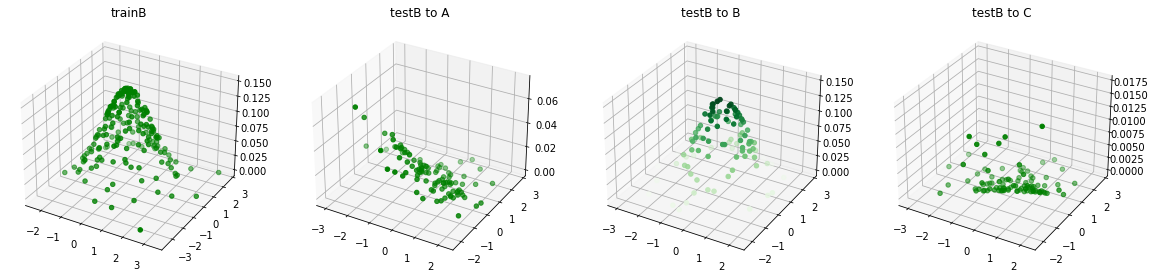

In [23]:
# plot the trainA in 3D 
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 4, 1, projection='3d')

x, y = trainB[:,0], trainB[:,1]
z = multivariate_normal.pdf(trainB, muB, covB);   # pdf of classA -> probability of trainA
ax.scatter3D(x, y, z, c='g')
ax.set_title('trainB')
# plot the data in testA which are classified as A
ax = fig.add_subplot(1, 4, 2, projection='3d')
x, y = testB[:,0], testB[:,1]
z = yB[:,0];   
ax.scatter3D(x, y, z, c='g')
ax.set_title('testB to A')
# plot the data in testA which are classified as B
ax = fig.add_subplot(1, 4, 3, projection='3d')
x, y = testB[:,0], testB[:,1]
z = yB[:,1];   
ax.scatter3D(x, y, z, c=z,cmap='Greens') 
ax.set_title('testB to B')
# plot the data in testA which are classified as C
ax = fig.add_subplot(1, 4, 4, projection='3d')
x, y = testB[:,0], testB[:,1]
z = yB[:,2];   
ax.scatter3D(x, y, z, c='g') 
ax.set_title('testB to C')
plt.show()

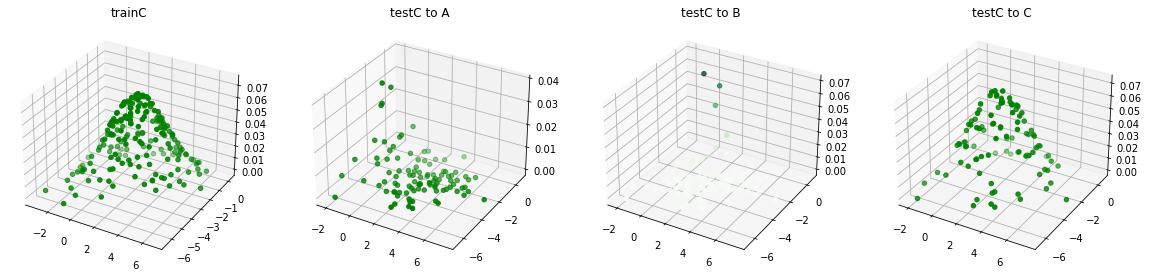

In [24]:
# plot the trainA in 3D 
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 4, 1, projection='3d')

x, y = trainC[:,0], trainC[:,1]
z = multivariate_normal.pdf(trainC, muC, covC);   # pdf of classA -> probability of trainA
ax.scatter3D(x, y, z, c='g')
ax.set_title('trainC')
# plot the data in testA which are classified as A
ax = fig.add_subplot(1, 4, 2, projection='3d')
x, y = testC[:,0], testC[:,1]
z = yC[:,0];   
ax.scatter3D(x, y, z, c='g')
ax.set_title('testC to A')
# plot the data in testA which are classified as B
ax = fig.add_subplot(1, 4, 3, projection='3d')
x, y = testC[:,0], testC[:,1]
z = yC[:,1];   
ax.scatter3D(x, y, z, c=z,cmap='Greens') 
ax.set_title('testC to B')
# plot the data in testA which are classified as C
ax = fig.add_subplot(1, 4, 4, projection='3d')
x, y = testC[:,0], testC[:,1]
z = yC[:,2];   
ax.scatter3D(x, y, z, c='g') 
ax.set_title('testC to C')
plt.show()